# Initializing Dataset

We must initialize the dataset first, loading it in as a pandas object from a JSON object.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette()

trainData = pd.read_json("train.json")
#testData = pd.read_json("test.json")
trainData.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


# Visualizing Data

Next, we want to start taking a look at what variables have most influence over the target variable. So, we want to compare the distributions of the varying factors.

### Interest Levels

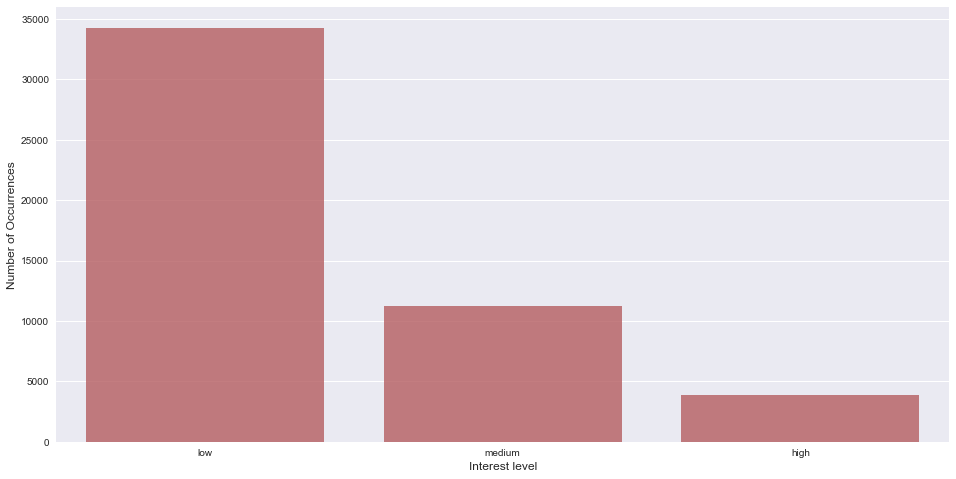

In [14]:
interestLevelCounts = trainData['interest_level'].value_counts()

plt.figure(figsize=(16,8))
sns.barplot(interestLevelCounts.index, interestLevelCounts.values, alpha=0.8, color=colors[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

The amount of 'low' interest level houses outnumbers the amount of 'medium' and 'high' occurances. This means the distribution is a bit unbalanced, and we need to be careful when analyzing direct numbers of the factors. We may want to consider using percentages when comparing variables.

### Bathrooms

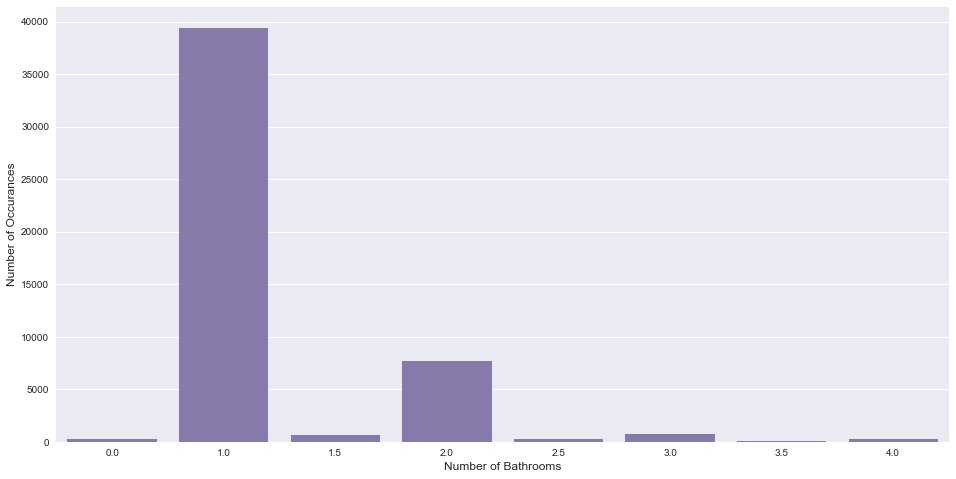

In [3]:
# Normalizing the outliers
outlierBathroomRows = trainData['bathrooms'] > 4
trainData.loc[outlierBathroomRows, 'bathrooms'] = 4

bathroomCount = trainData['bathrooms'].value_counts()

plt.figure(figsize=(16,8))
sns.barplot(bathroomCount.index, bathroomCount.values, color=colors[3])
plt.ylabel('Number of Occurances', fontsize=12)
plt.xlabel('Number of Bathrooms', fontsize=12)
plt.show()

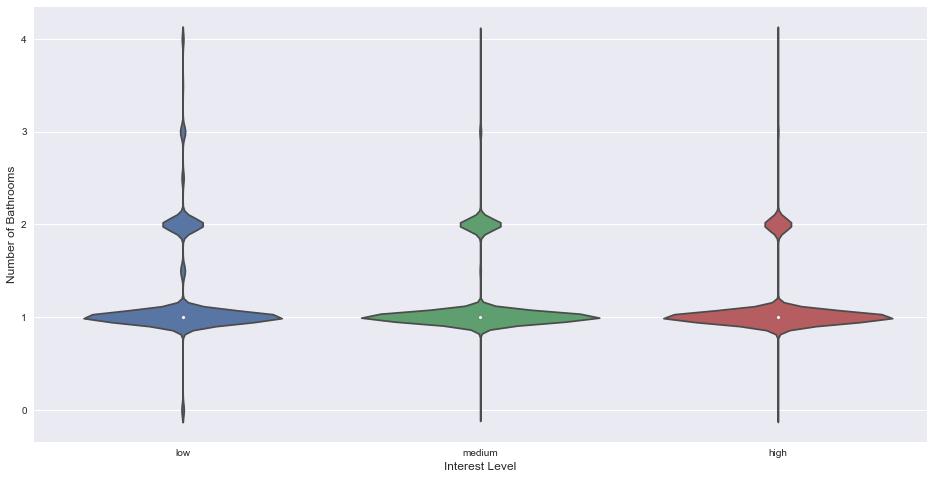

In [4]:
#trainData['bathrooms'].ix[trainData['bathrooms'] > 4] = 4

plt.figure(figsize=(16,8))
sns.violinplot(trainData['interest_level'], trainData['bathrooms'], order=['low','medium','high'])
plt.xlabel('Interest Level', fontsize=12)
plt.ylabel('Number of Bathrooms', fontsize=12)
plt.show()

### Prices

/Users/JustinonTG/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


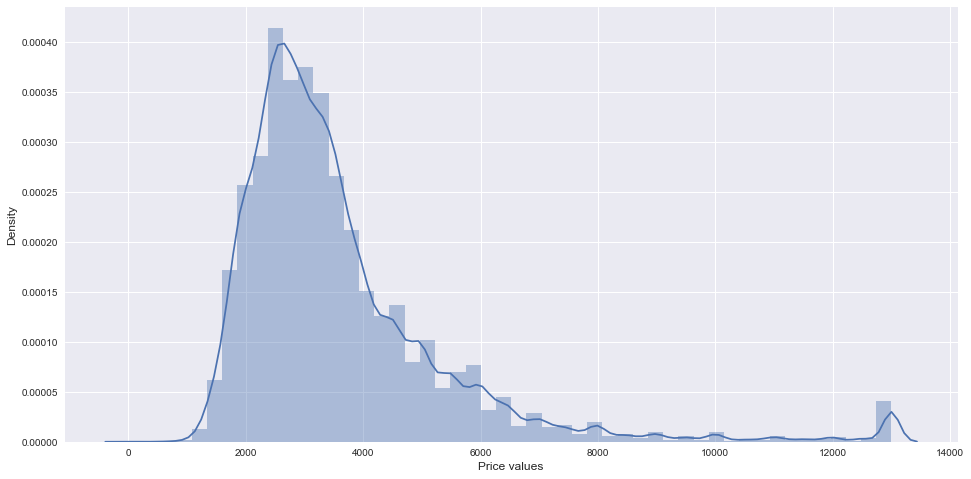

In [5]:
# Normalizing the outliers
percentile_99_Price = np.percentile(trainData['price'], 99)
outlierPriceRows = trainData['price'] > percentile_99_Price
trainData.loc[outlierPriceRows, 'price'] = percentile_99_Price

plt.figure(figsize=(16,8))
sns.distplot(trainData['price'])
plt.xlabel('Price values', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

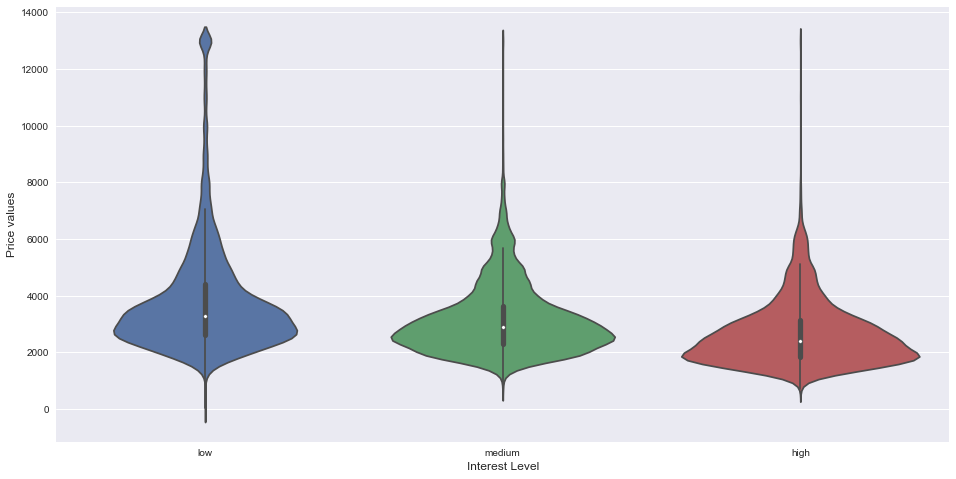

In [6]:
plt.figure(figsize=(16,8))
sns.violinplot(x='interest_level', y='price', data=trainData, order=['low','medium','high'])
plt.xlabel('Interest Level', fontsize=12)
plt.ylabel('Price values', fontsize=12)
plt.show()

It's easy to notice here that the 'low' interest level flats also are the ones that have the most density in the higher price values. Also, the 'high' interest level flats have a lower average price. This is logical, and helps in our prediction.

### Bedrooms

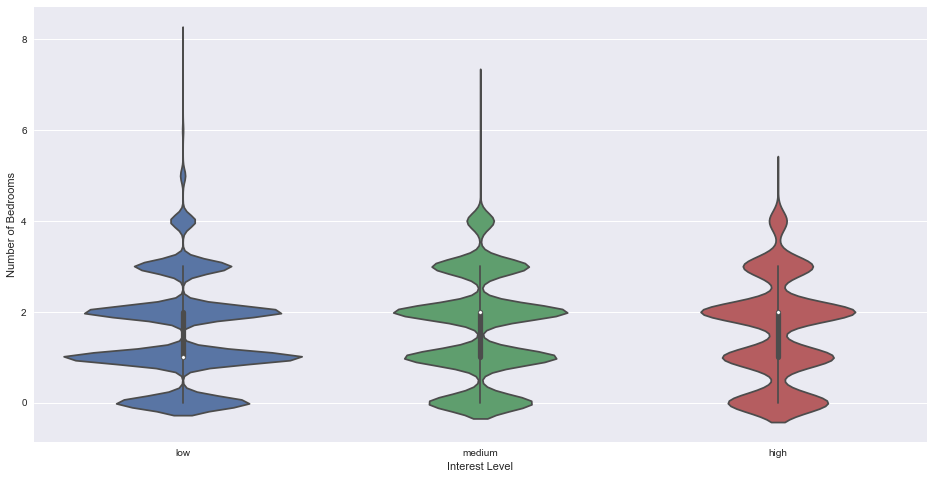

In [7]:
plt.figure(figsize=(16,8))
sns.violinplot(x='interest_level', y='bedrooms', data=trainData, order=["low","medium","high"])
plt.xlabel('Interest Level')
plt.ylabel('Number of Bedrooms')
plt.show()

## Geolocation

### Latitude

/Users/JustinonTG/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


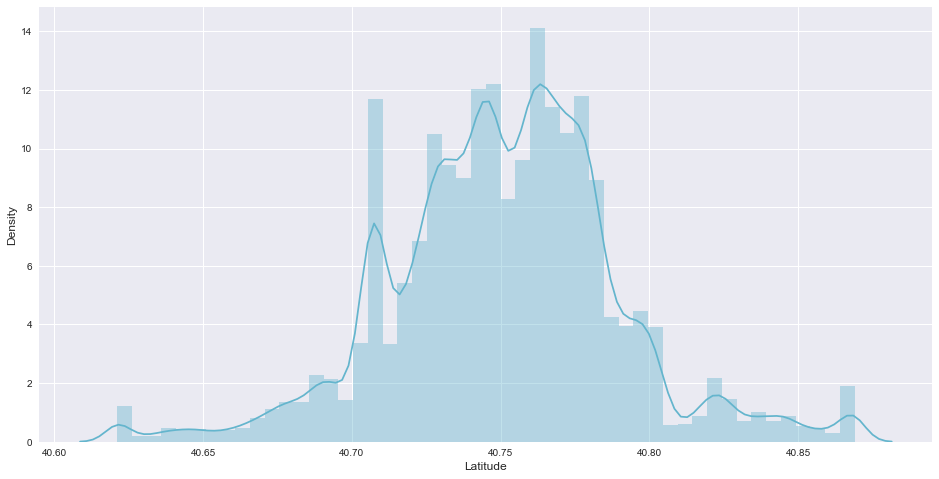

In [8]:
# Normalizing the outliers
percentile_995_Latitude = np.percentile(trainData['latitude'], 99.5)
percentile_005_Latitude = np.percentile(trainData['latitude'], .5)
outlierUpperLatRows = trainData['latitude'] > percentile_995_Latitude
outlierLowerLatRows = trainData['latitude'] < percentile_005_Latitude
trainData.loc[outlierUpperLatRows, 'latitude'] = percentile_995_Latitude
trainData.loc[outlierLowerLatRows, 'latitude'] = percentile_005_Latitude

plt.figure(figsize=(16,8))
sns.distplot(trainData['latitude'], color=colors[5])
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

Interestingly, the latitude appears to follow a Gaussian distribution. Further bootstrap testing and Q-Q plotting should be conducted here to compare to the normal.

### Longitude

/Users/JustinonTG/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


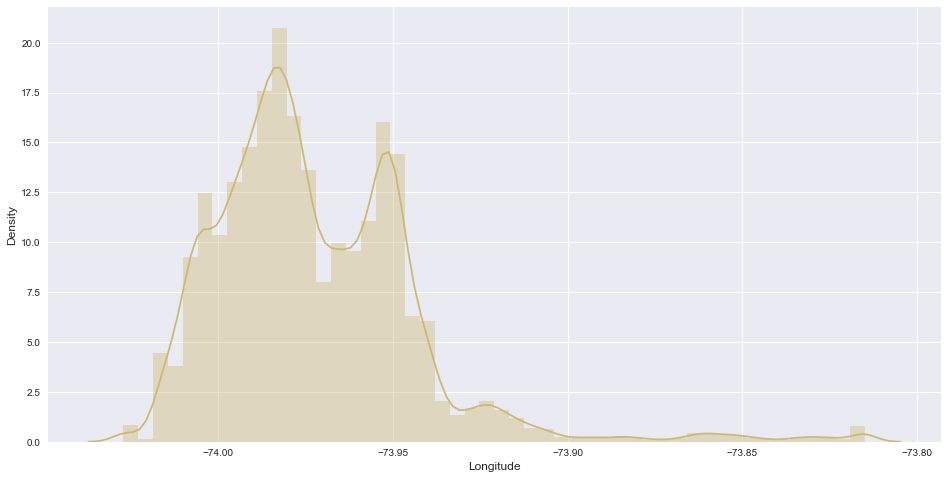

In [9]:
# Normalizing the outliers
percentile_9975_Longitude = np.percentile(trainData['longitude'], 99.75)
percentile_0025_Longitude = np.percentile(trainData['longitude'], .25)
outlierUpperLongRows = trainData['longitude'] > percentile_9975_Longitude
outlierLowerLongRows = trainData['longitude'] < percentile_0025_Longitude
trainData.loc[outlierUpperLongRows, 'longitude'] = percentile_9975_Longitude
trainData.loc[outlierLowerLongRows, 'longitude'] = percentile_0025_Longitude

plt.figure(figsize=(16,8))
sns.distplot(trainData['longitude'], color=colors[4])
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()